<a href="https://colab.research.google.com/github/NaufalAN/Machine-Learning/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

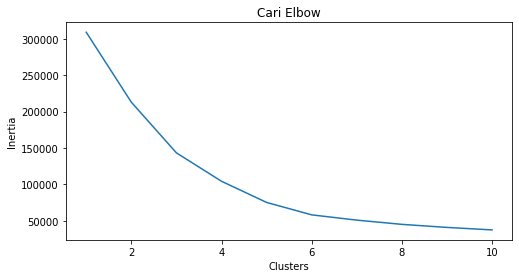

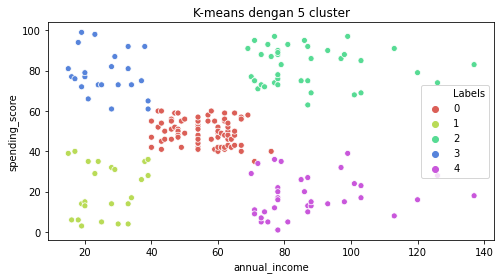

In [16]:
#Required library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans 

#Convert csv to pandas dataframe
df = pd.read_csv('Mall_Customers.csv')

#Data preprocessing
#Renaming columns
df = df.rename(columns={"Gender" : "gender", "Age" : "age",
                        "Annual Income (k$)" : "annual_income",
                        "Spending Score (1-100)" : "spending_score"})
#Change categorical data to numerical
df['gender'].replace(['Female', 'Male'],[0,1],inplace=True)
#Remove 'CustomerID' column
X = df.drop(['CustomerID','gender'],axis=1)

#Create list that hold inertia for K value
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

#Create elbow inertia plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#Create K-means model
km5 = KMeans(n_clusters=5).fit(X)

#Add label column in dataset
X['Labels'] = km5.labels_

#Create K-means plot with 5 clusters
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'],X['spending_score'], hue=X['Labels'],
                palette = sns.color_palette('hls',5))
plt.title('K-means dengan 5 cluster')
plt.show()